### EEG Digital Signals Processing

Each file contains around 256 signals per second were recorded over 3600 seconds; resulting in 921600 signals / seconds and there are 23 columns corresponding to the 23 channels.

Drawing an example of the signals

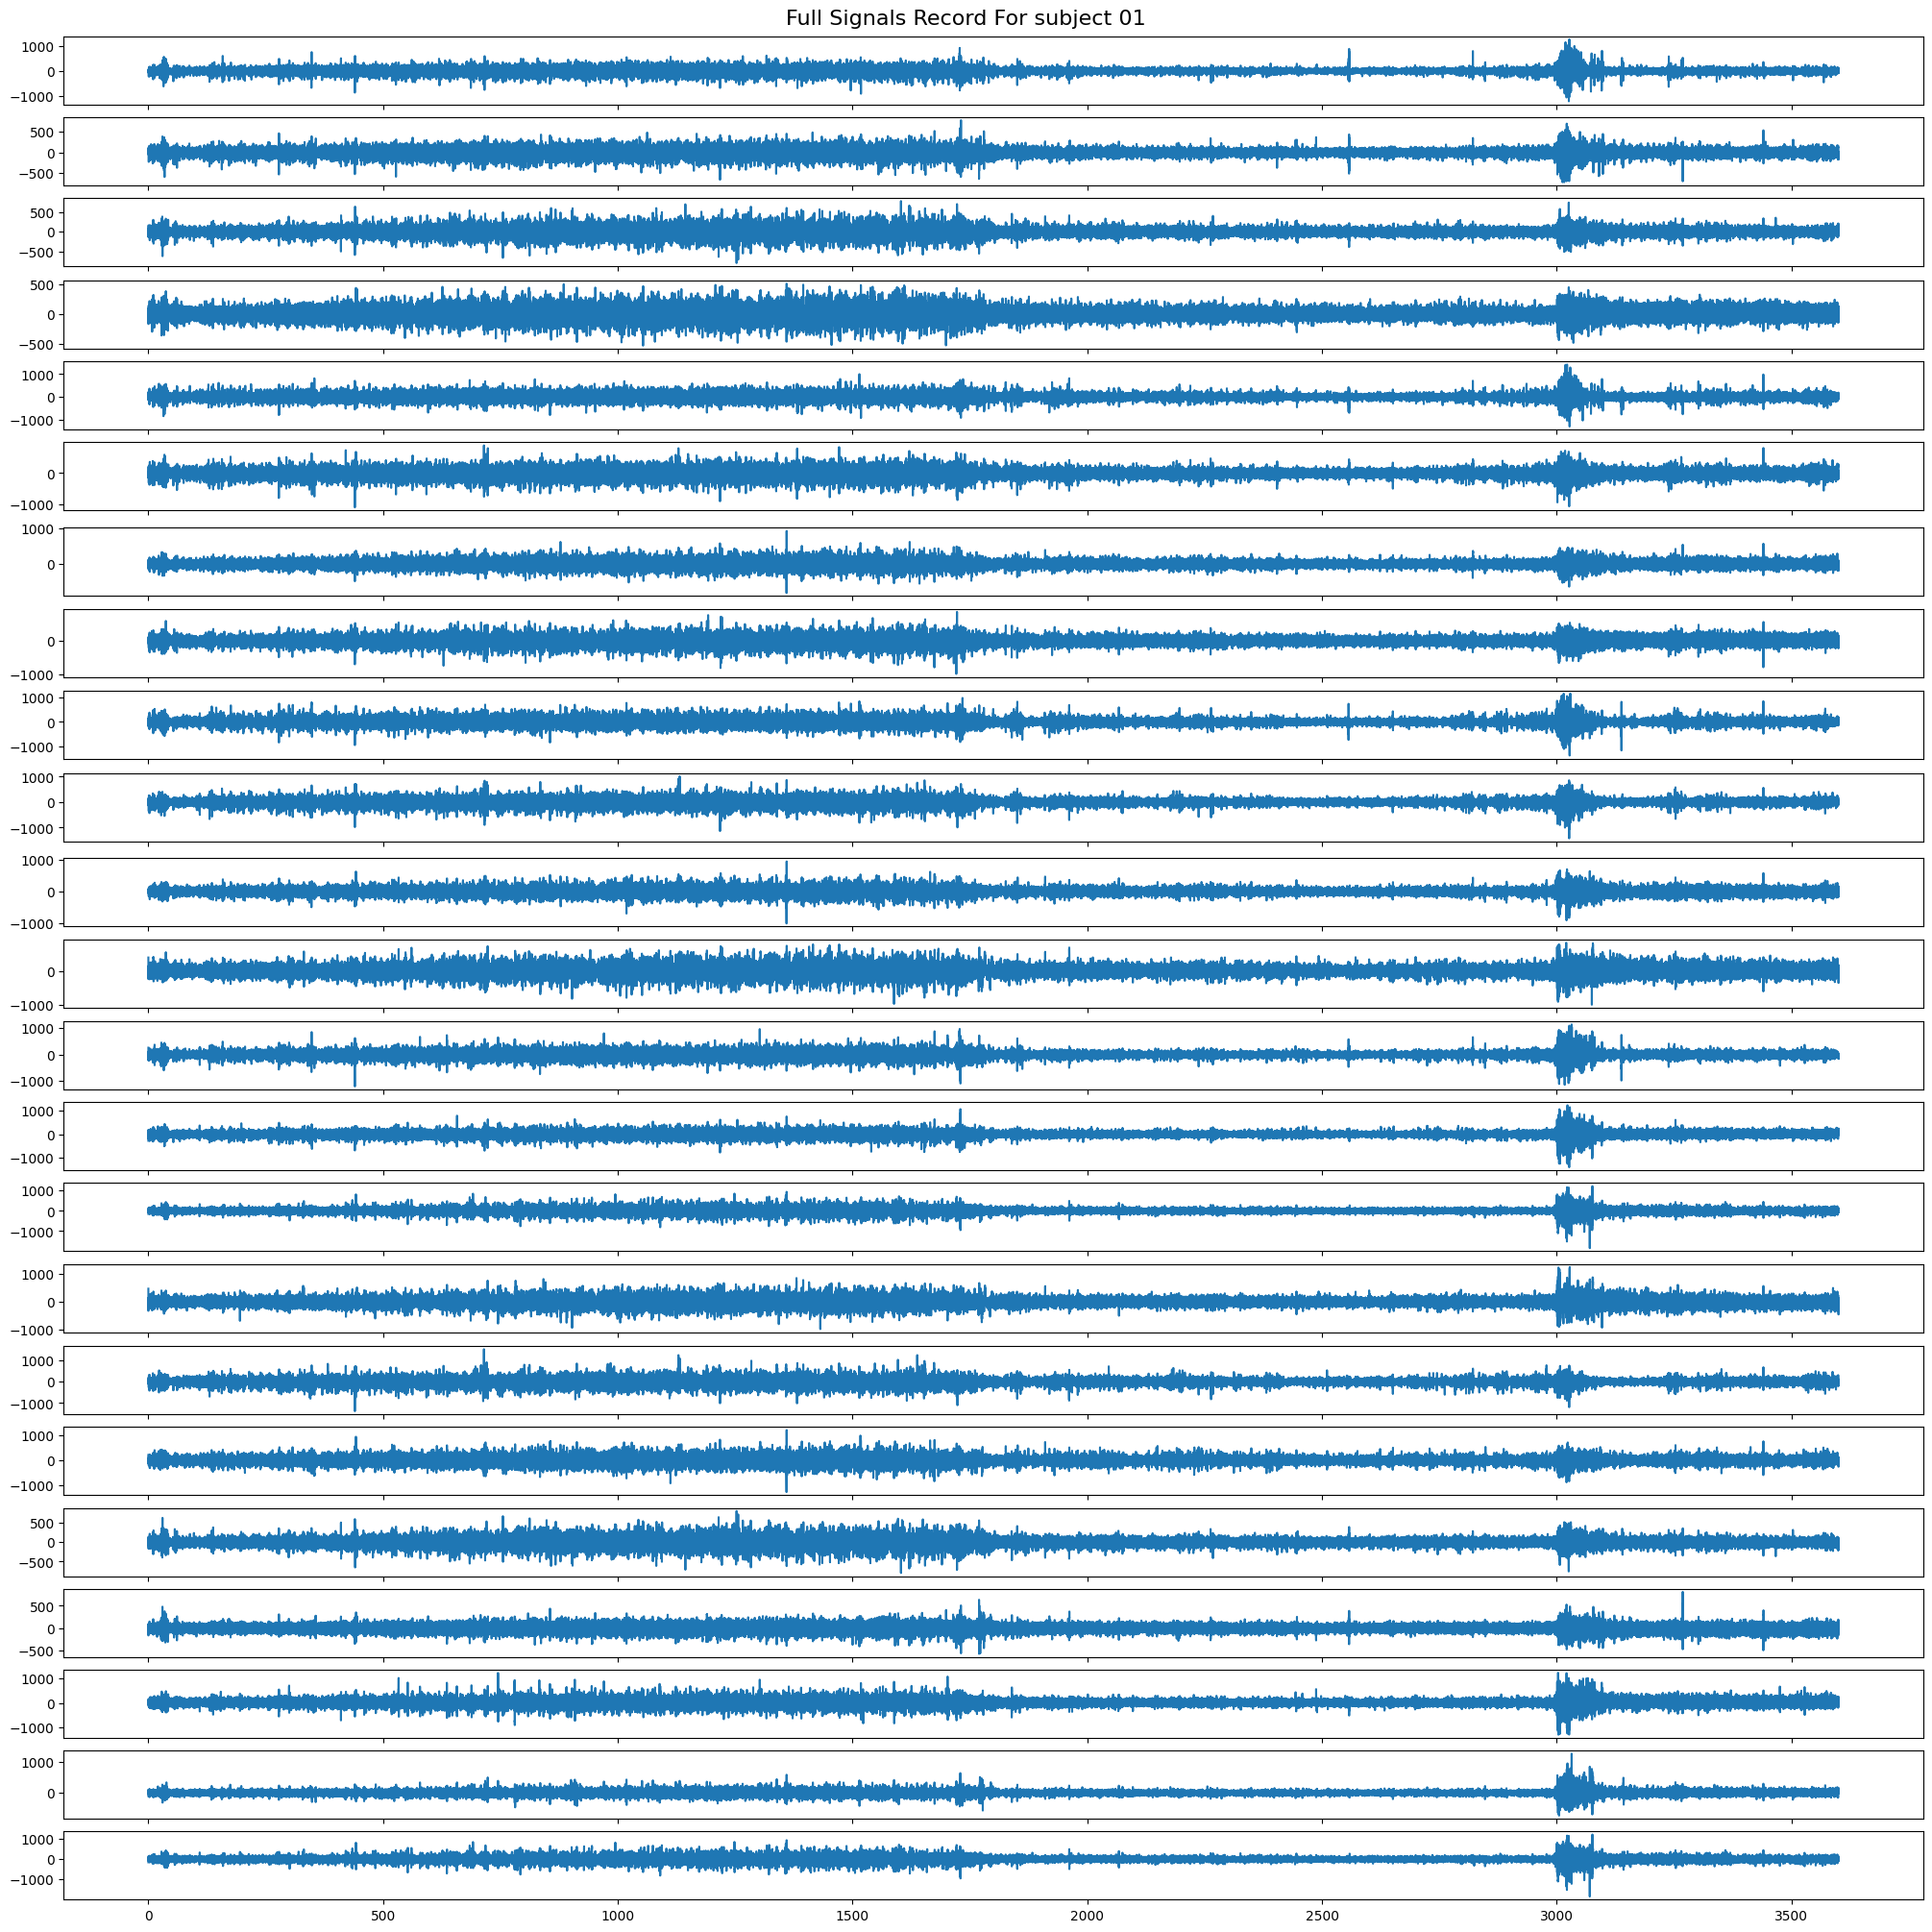

In [51]:
import scipy.io
import matplotlib.pyplot as plt
from numpy.core import linspace

# load the mat file 1
mat1 = scipy.io.loadmat(
    'data/01_01_edfm.mat')
data1 = mat1["val"]

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('Full Signals Record For subject 01', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    # plot time signal:
    axs[channel].plot(t, data1[channel])
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure


Text(0.5, 0, 'time (s)')

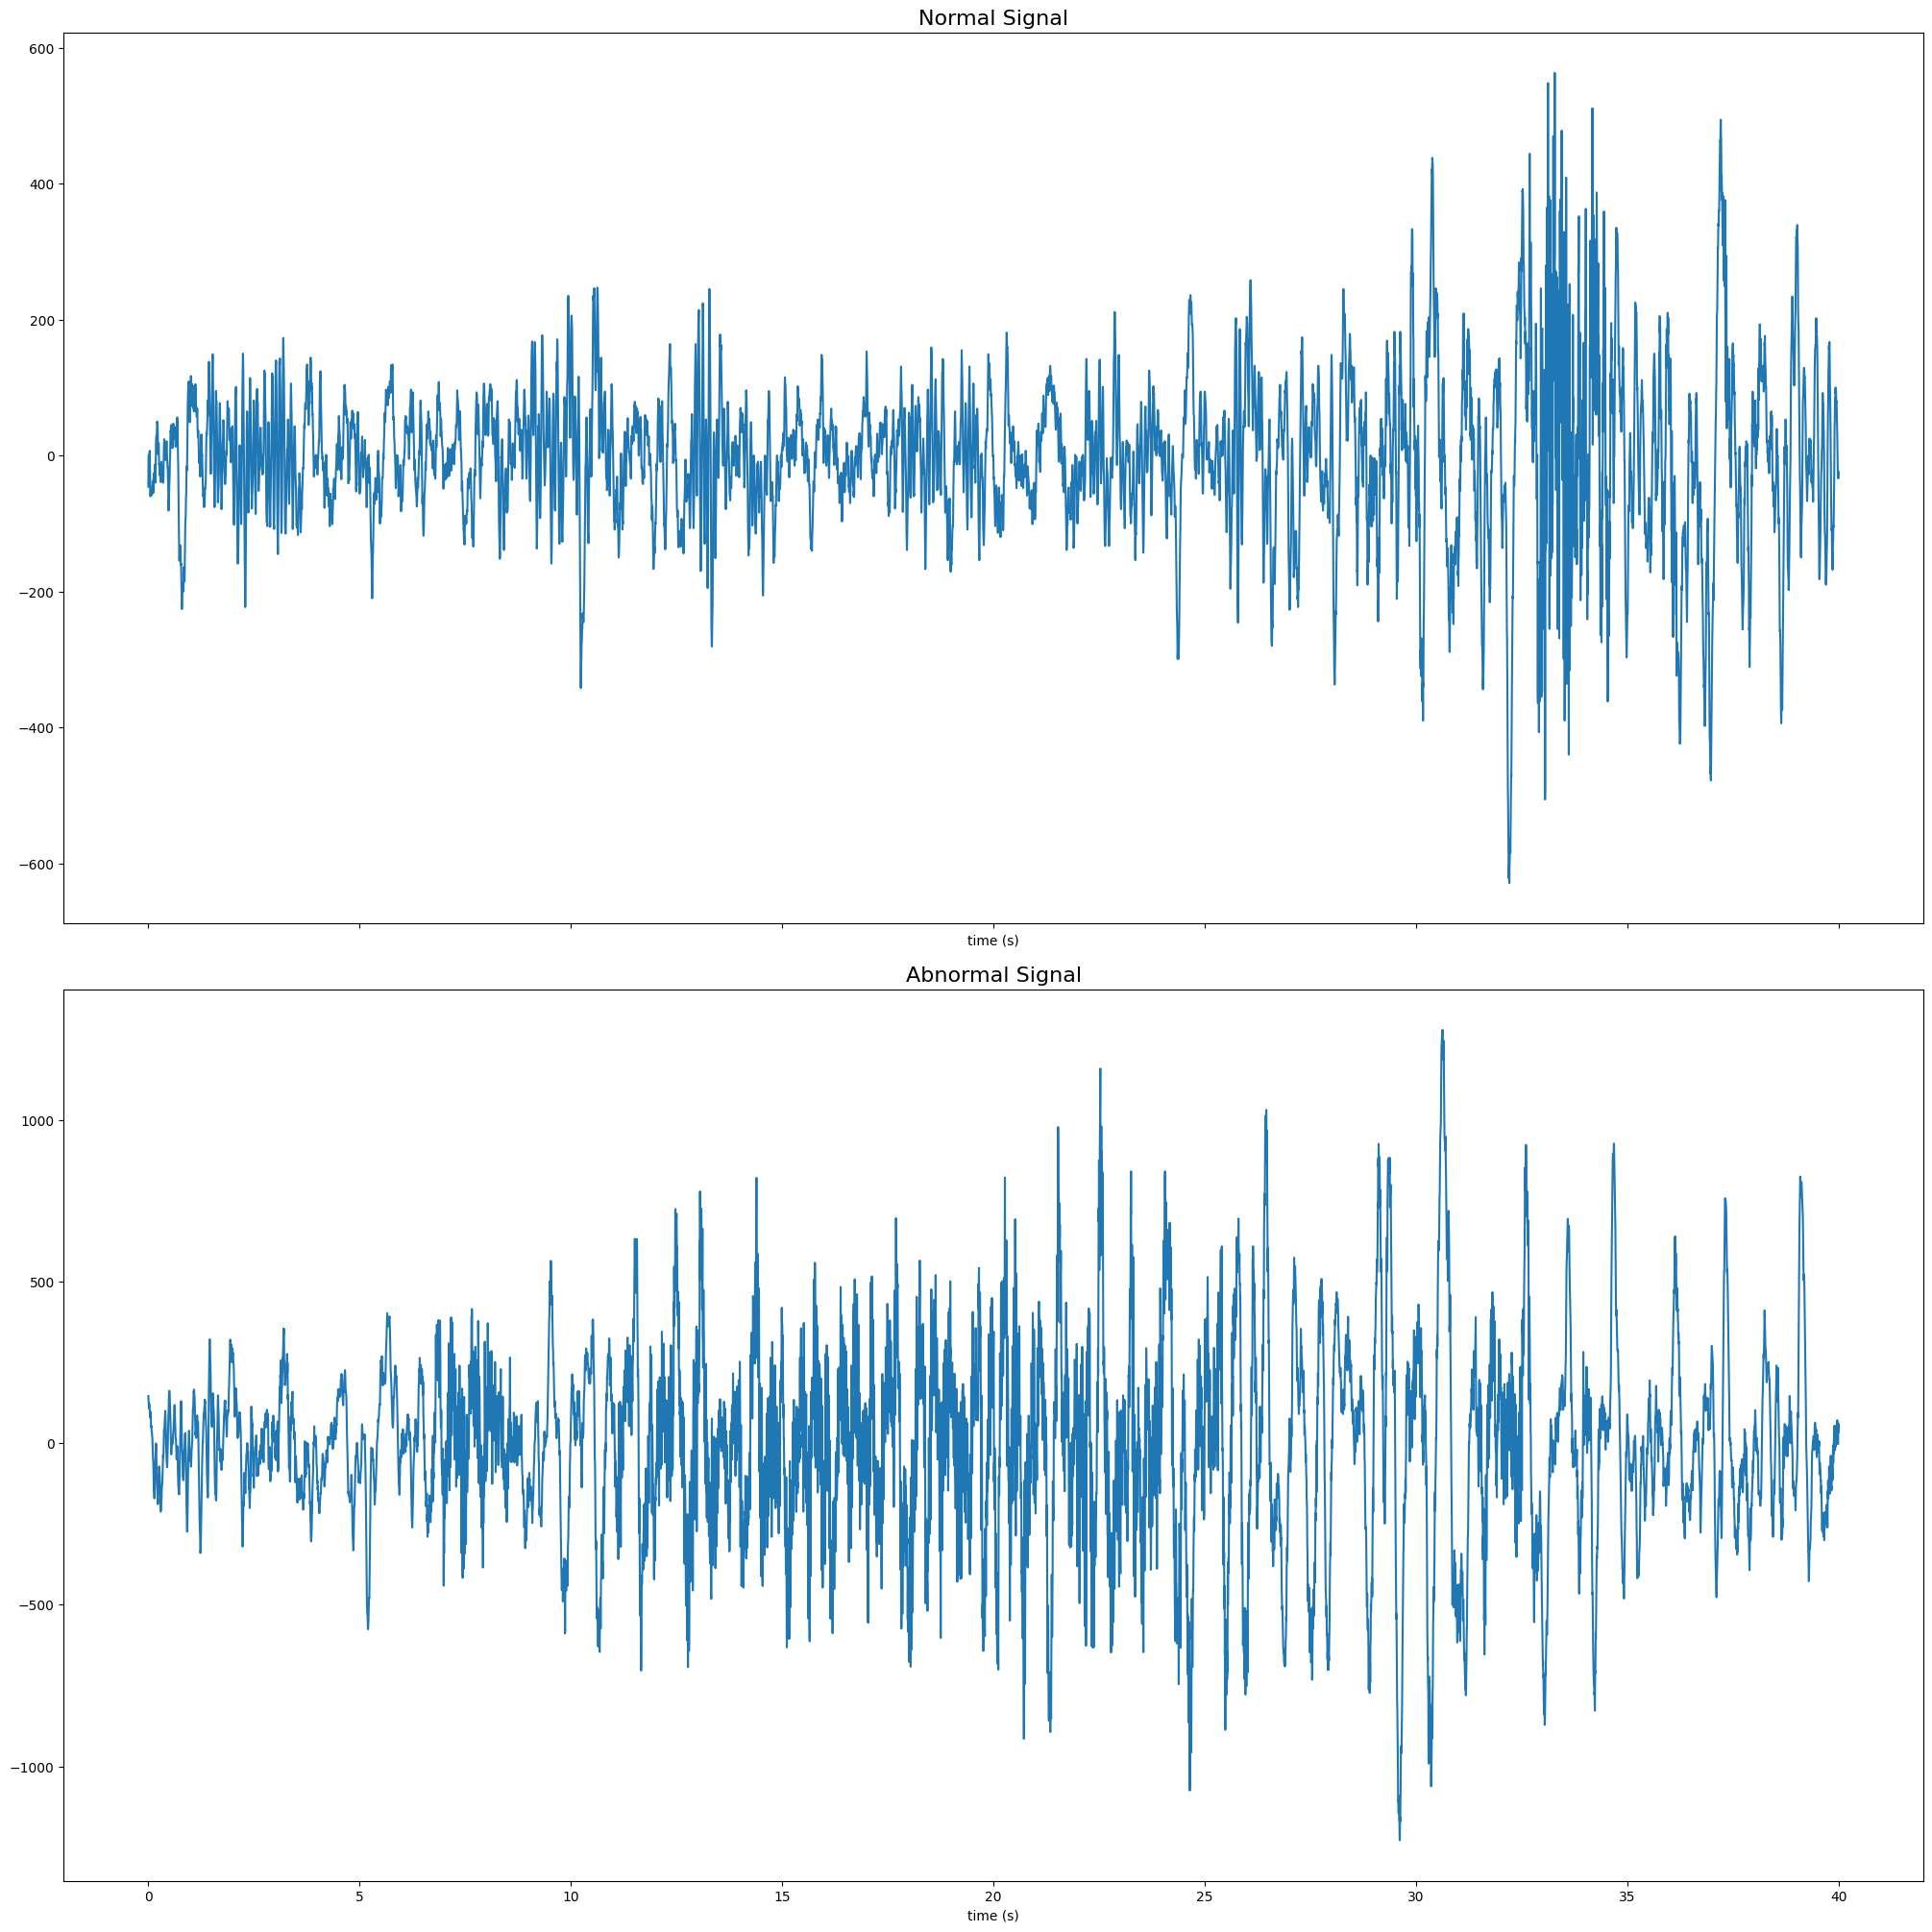

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 20), layout='constrained')
t = linspace(0, 40, 40*256, endpoint=True)
ax1.plot(t, data1[0][0:10240])
ax1.set_title('Normal Signal', fontsize=16)
ax1.set_xlabel('time (s)')

ax2.plot(t, data1[0][766976:777216])
ax2.set_title('Abnormal Signal', fontsize=16)
ax2.set_xlabel('time (s)')

Removing DC Offset

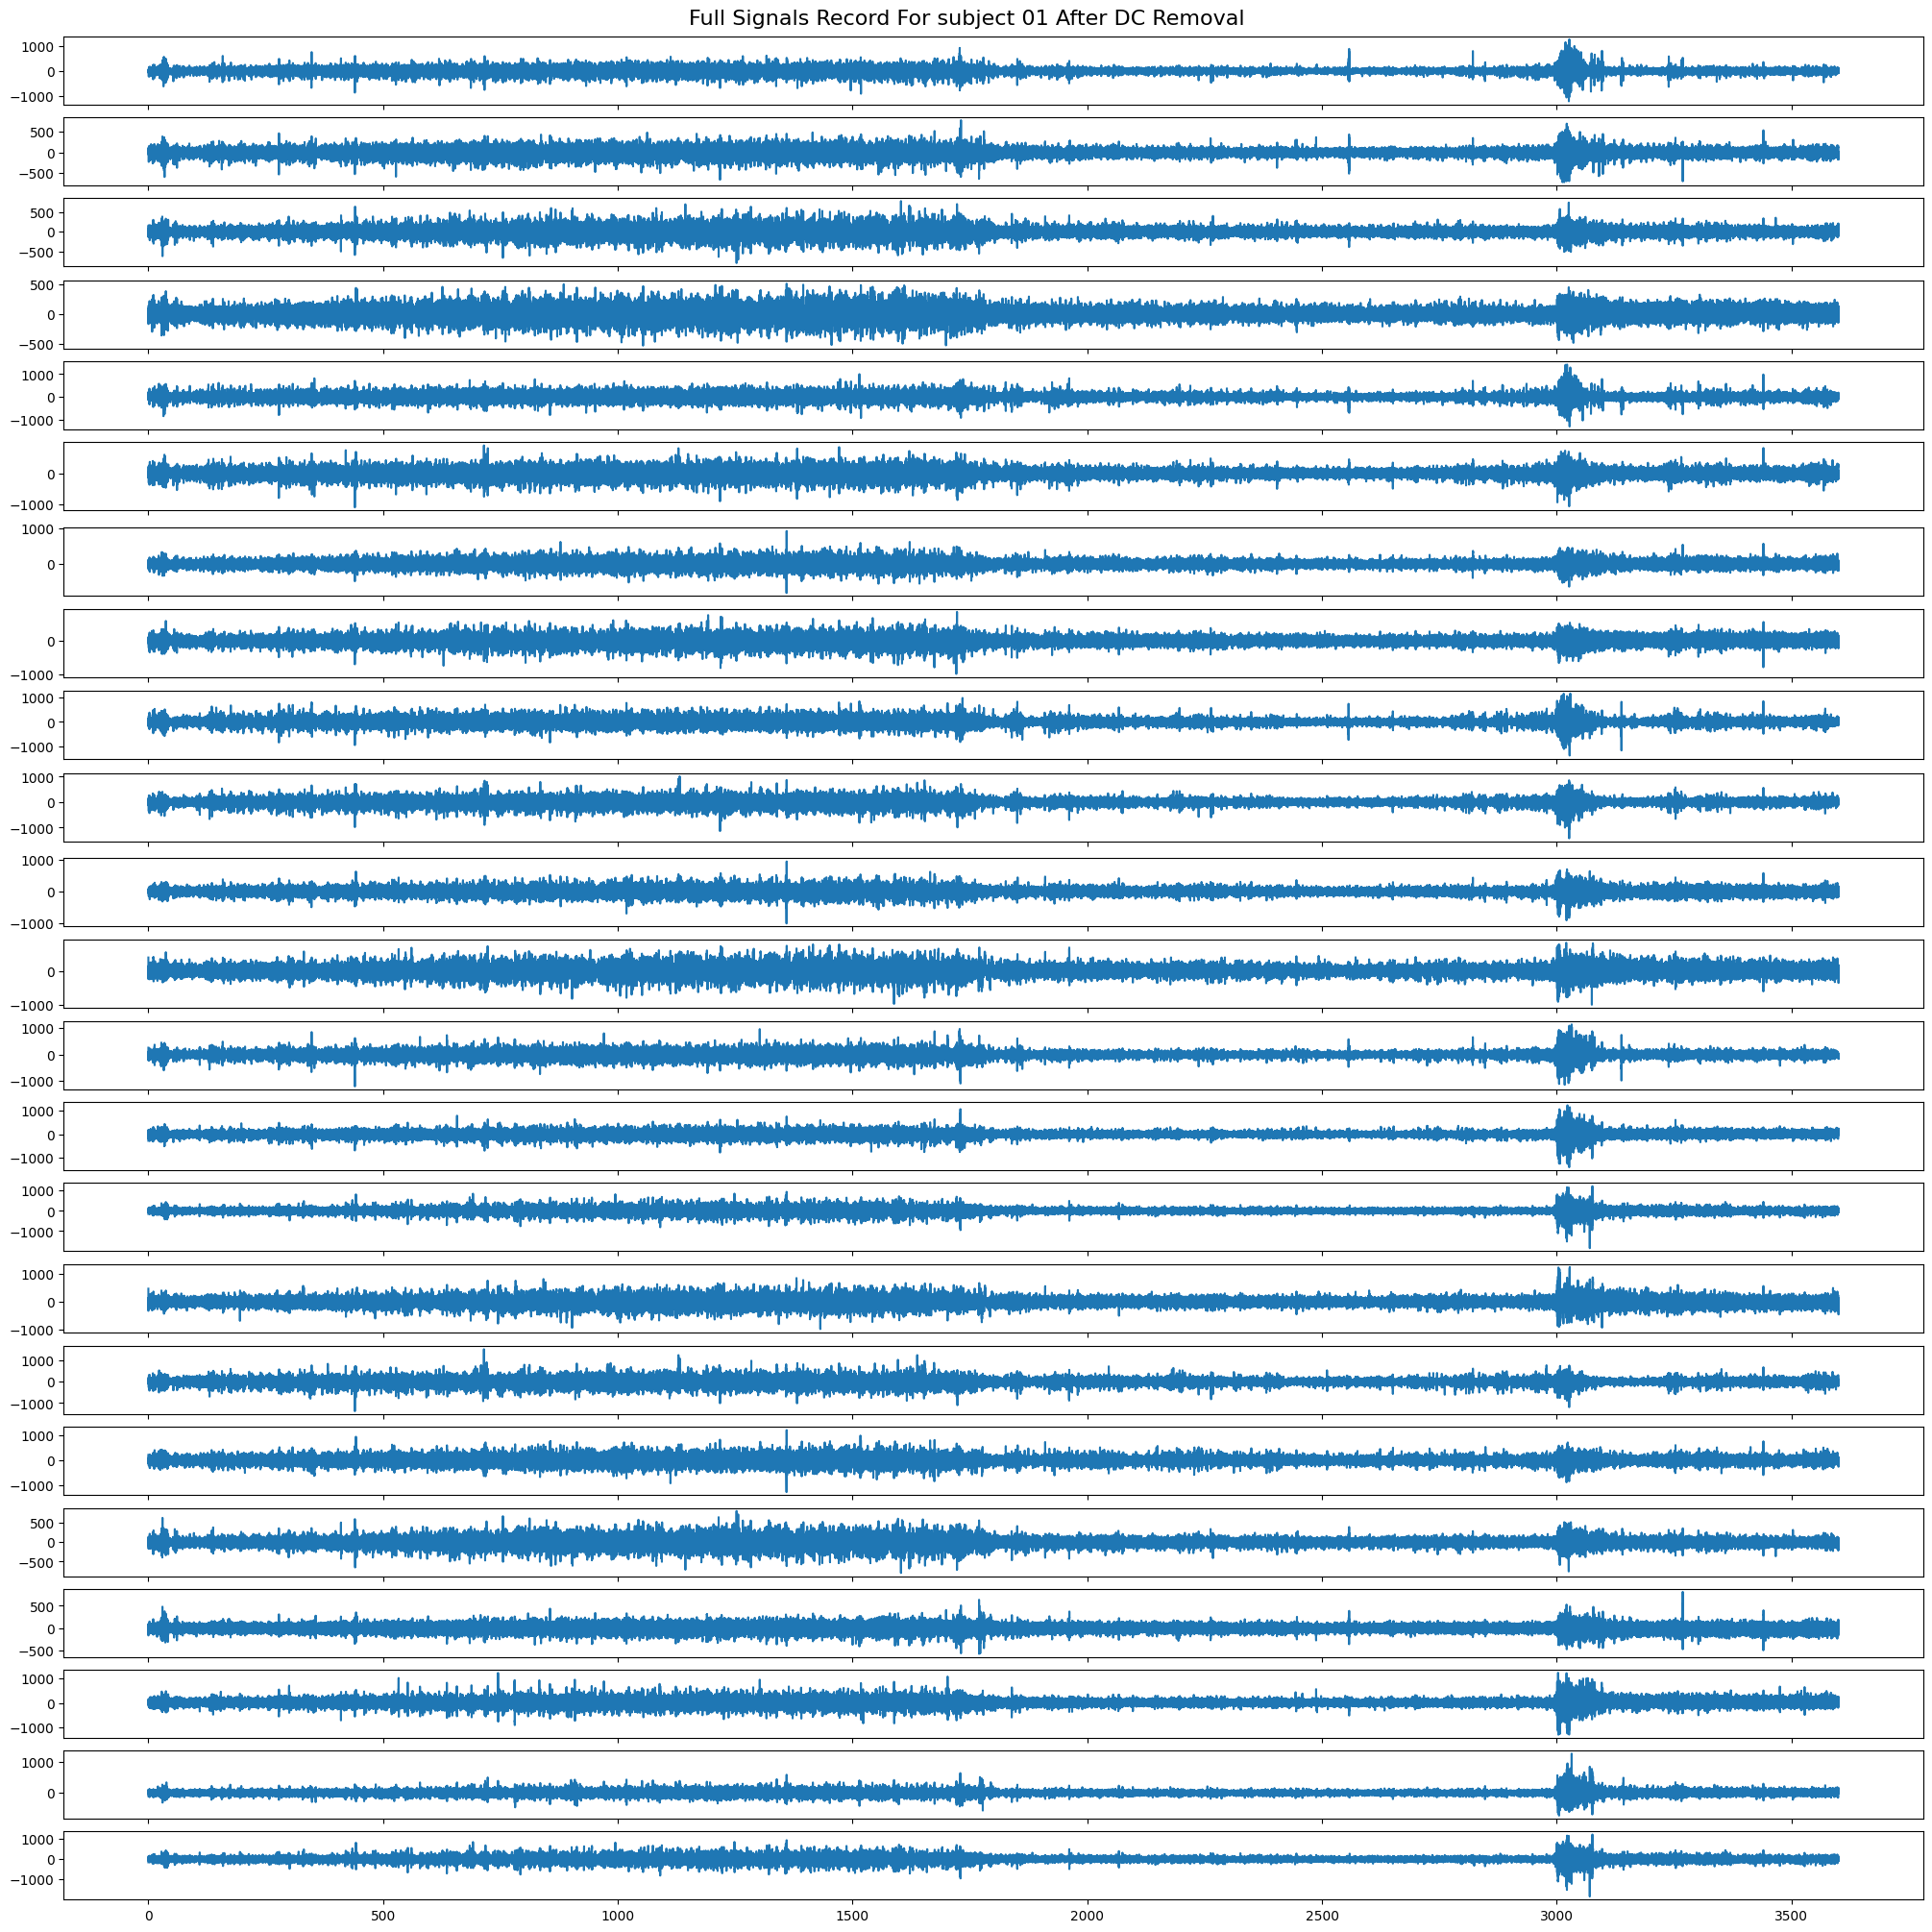

In [59]:
import numpy as np

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('Full Signals Record For subject 01 After DC Removal', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    channel_DCRemoved = data1[channel] - np.mean(data1[channel])
    # plot time signal:
    axs[channel].plot(t, channel_DCRemoved)
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure


Using Moving Filter

A moving average filter is a type of finite impulse response (FIR) filter that computes the average of a set of consecutive samples in a signal. It's considered a low pass filter because it attenuates higher frequency components in the signal, effectively smoothing it out.
Rather than processing each sample individually, the moving average filter considers a window of samples and calculates the average within that window. This averaging process helps reduce random noise present in the signal, making it useful in various signal processing applications where noise reduction is essential.
One of its key advantages is its ability to reduce noise while preserving the sharpness of step transitions in the signal, which is important in applications where sudden changes need to be maintained without being distorted by excessive filtering.

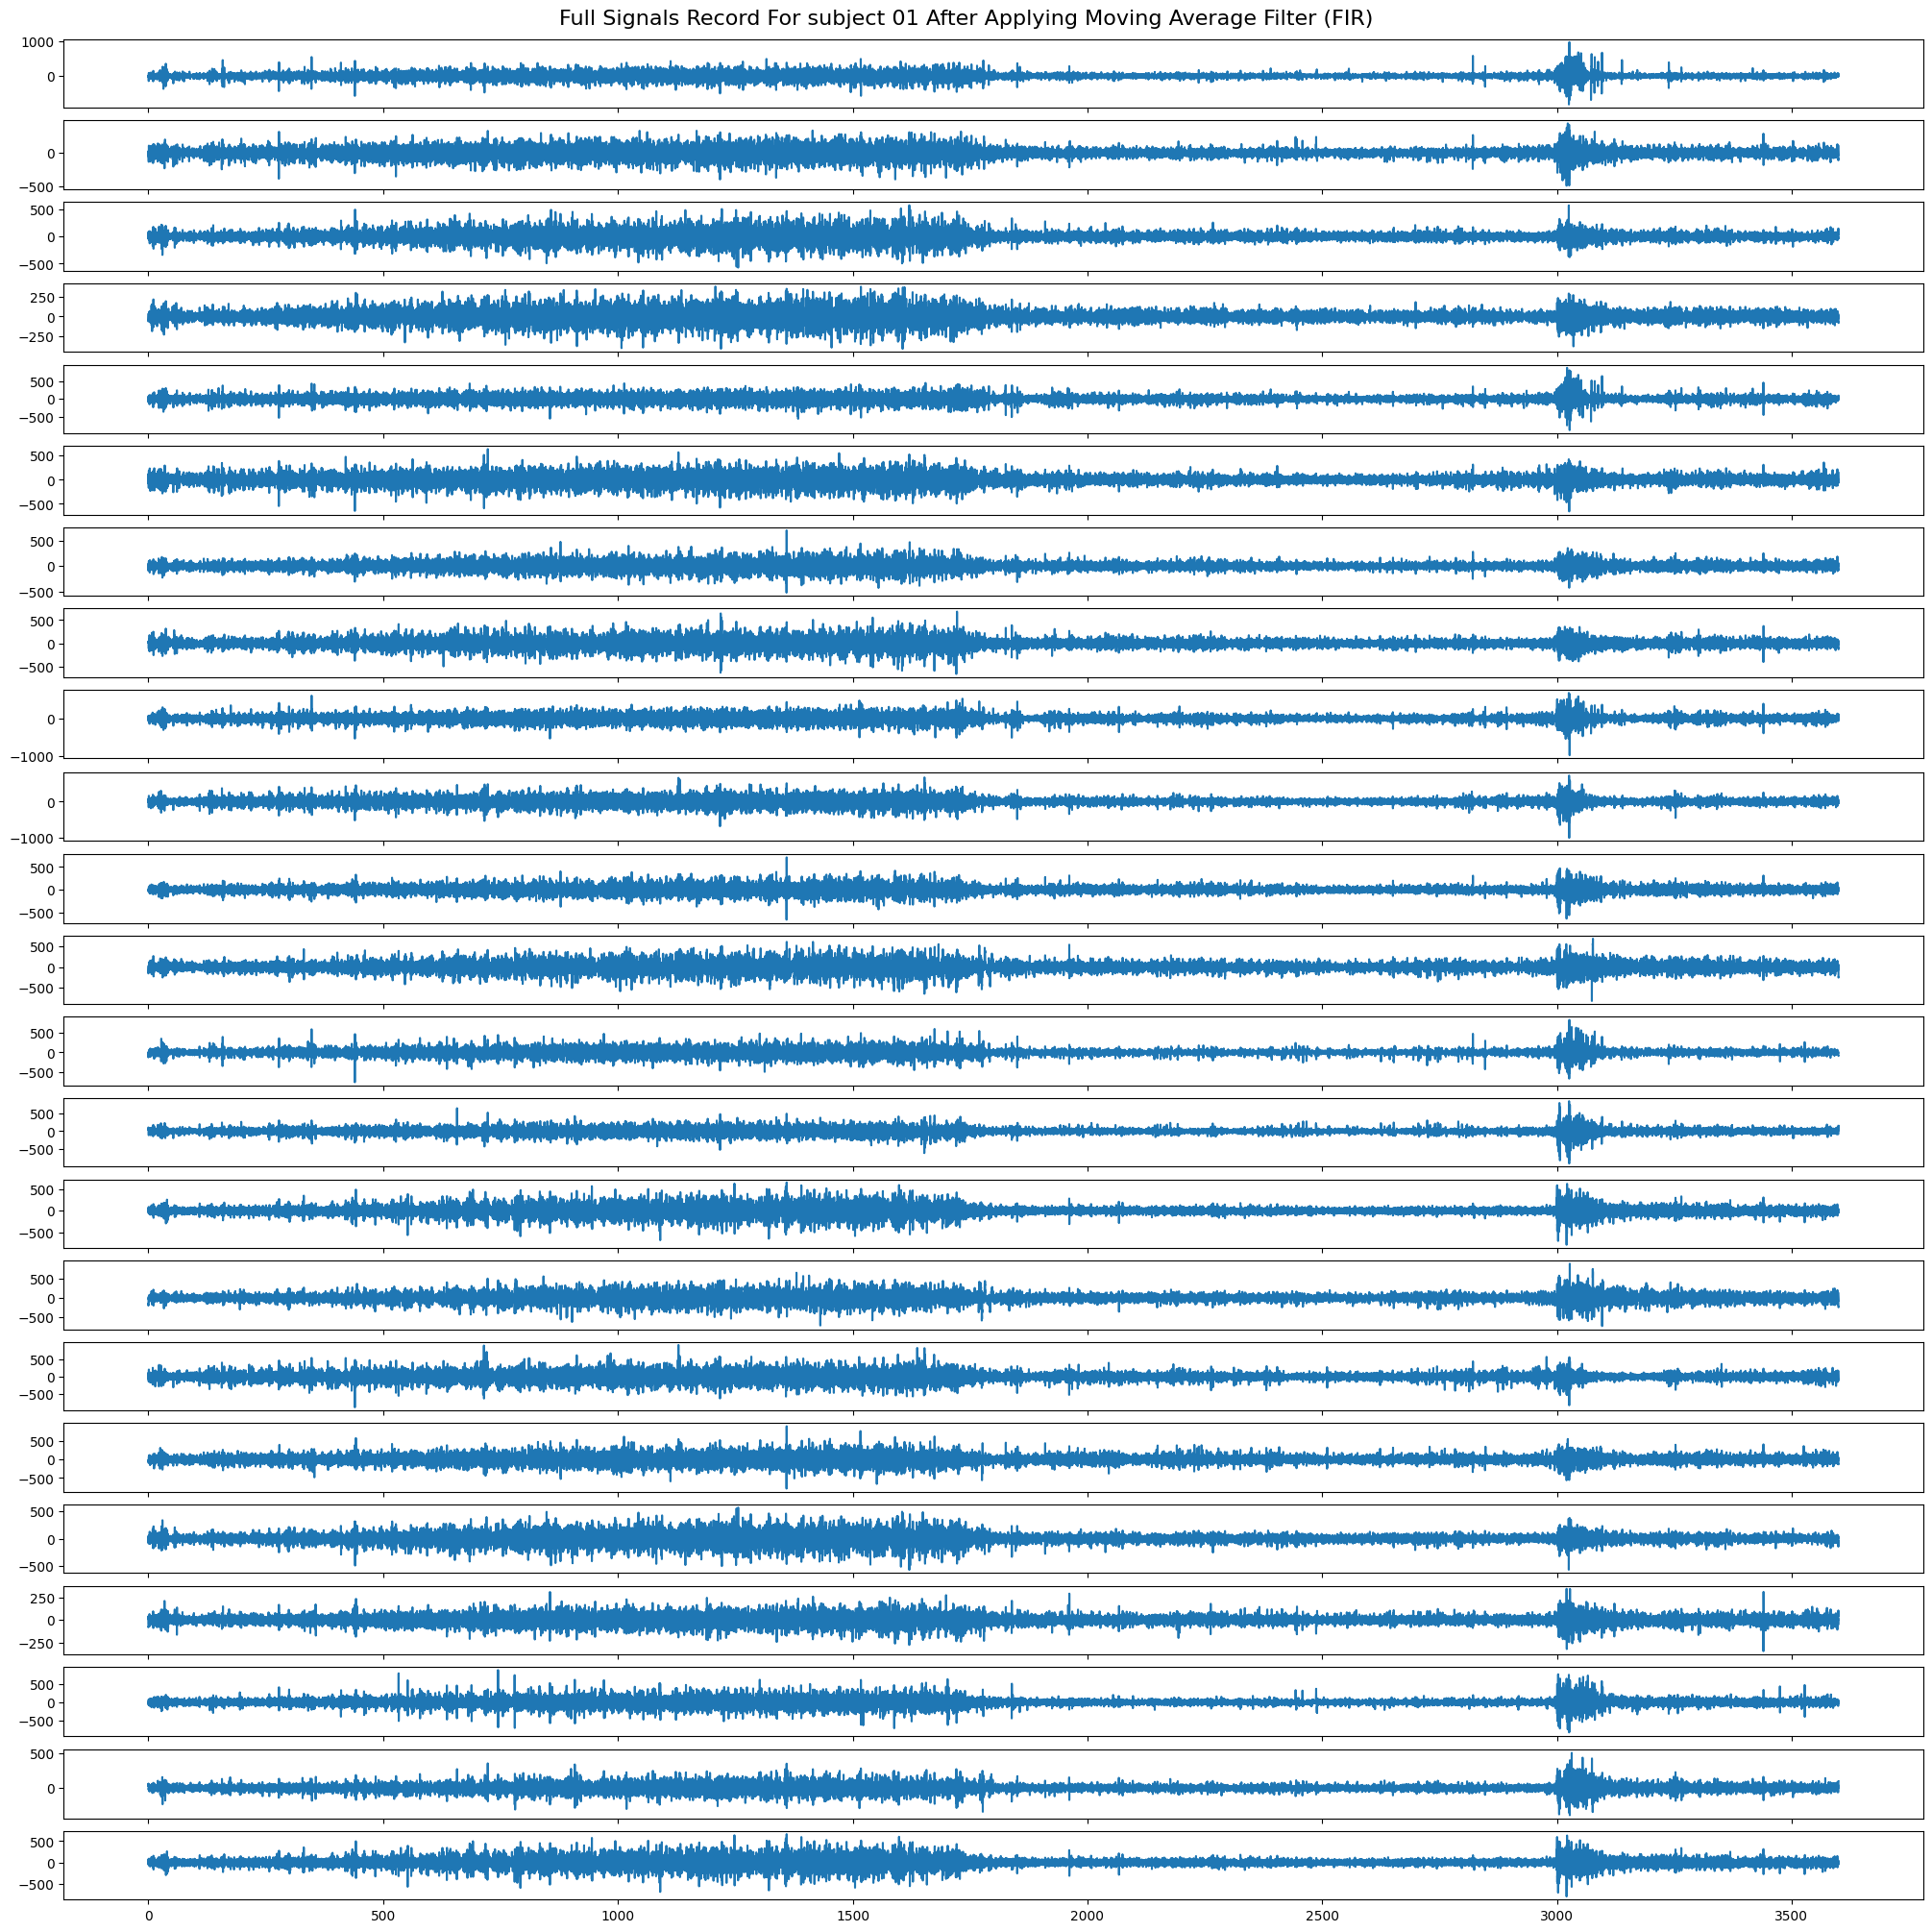

In [74]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('Full Signals Record For subject 01 After Applying Moving Average Filter (FIR)', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    channel_DCRemoved = data1[channel] - np.mean(data1[channel])
    ma = moving_average(channel_DCRemoved, 50)  # window of length 50
    # plot time signal:
    axs[channel].plot(t[:len(ma)], ma)
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure


Using IIR Filter

IIR (Infinite Impulse Response) filters use feedback from previous outputs along with current inputs, allowing for more efficient processing and often requiring fewer coefficients than FIR (Finite Impulse Response) filters, which only rely on current and past inputs for computation without feedback.

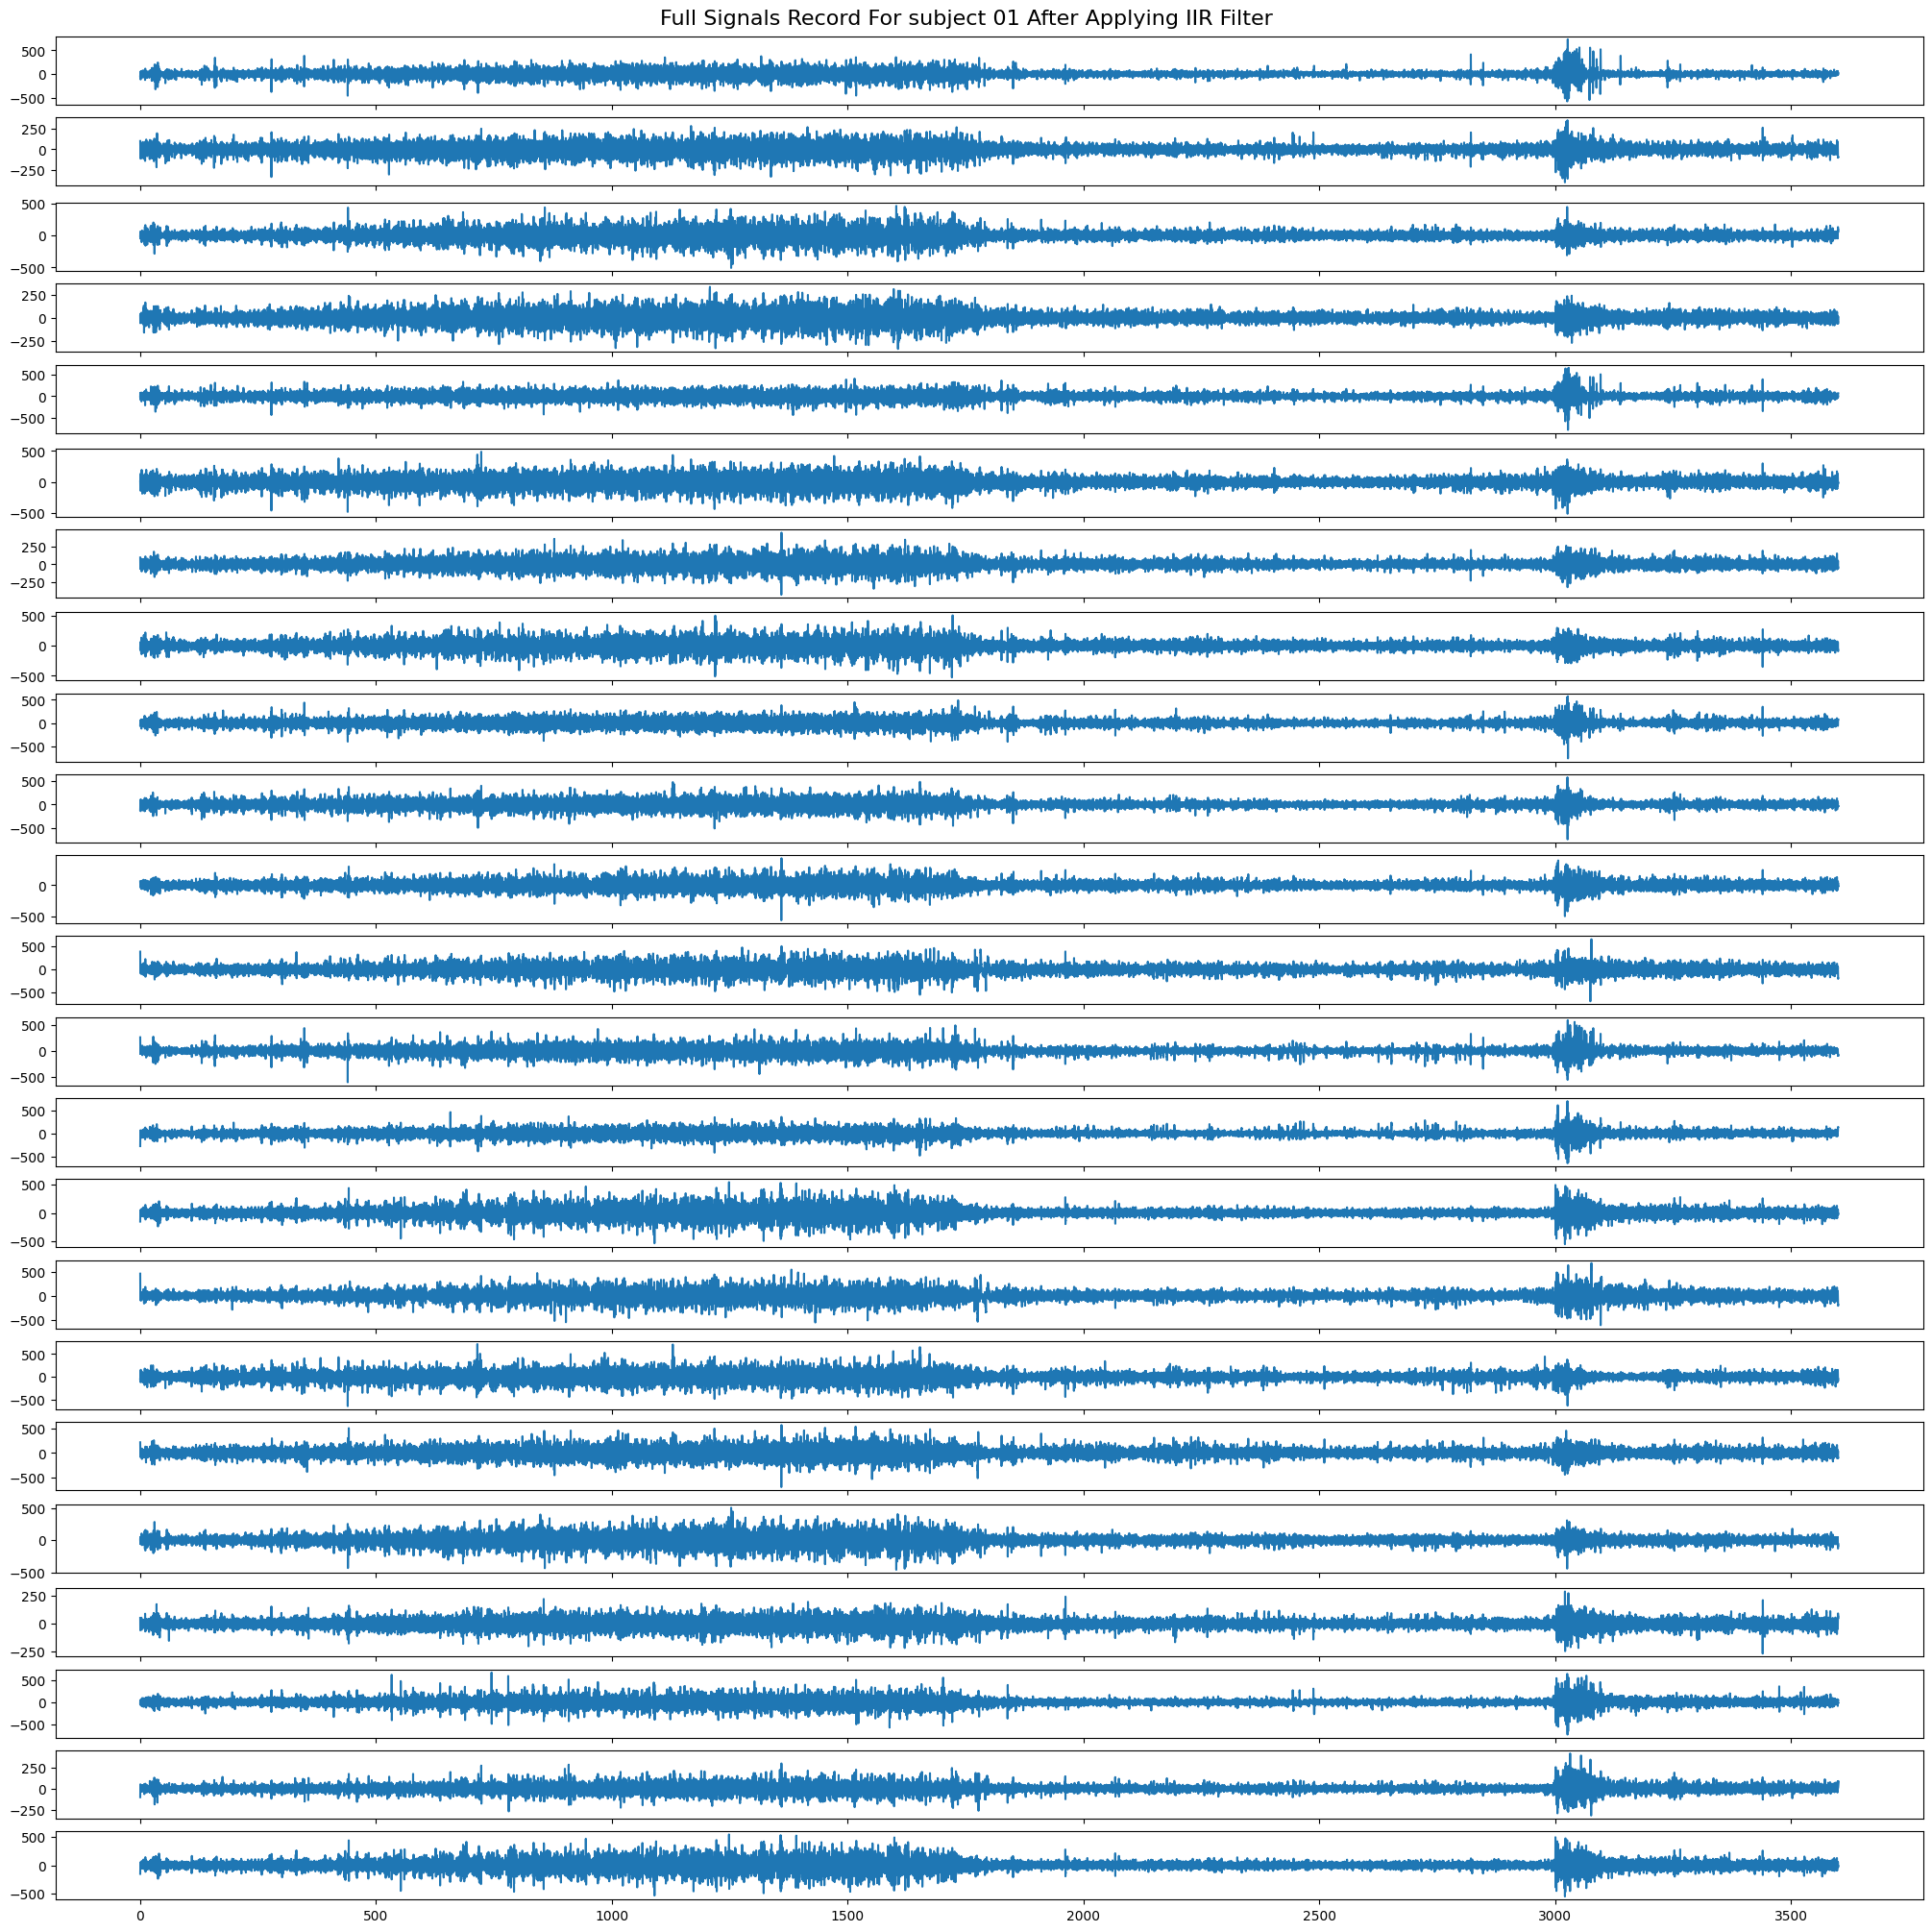

In [75]:
from scipy.signal import lfilter, lfiltic

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('Full Signals Record For subject 01 After Applying IIR Filter', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    channel_DCRemoved = data1[channel] - np.mean(data1[channel])
    ## creating IIR filter:
    a = 0.03
    b = 1 - a
    zi = lfiltic([a], [1, -b], y=[channel_DCRemoved[0]])
    y, zo = lfilter([a], [1, -b], channel_DCRemoved, zi=zi)
    
    # plot time signal:
    t = np.linspace(0, 3600, len(y), endpoint=True)
    axs[channel].plot(t[:len(y)], y)
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure

Fast Fourier Transform

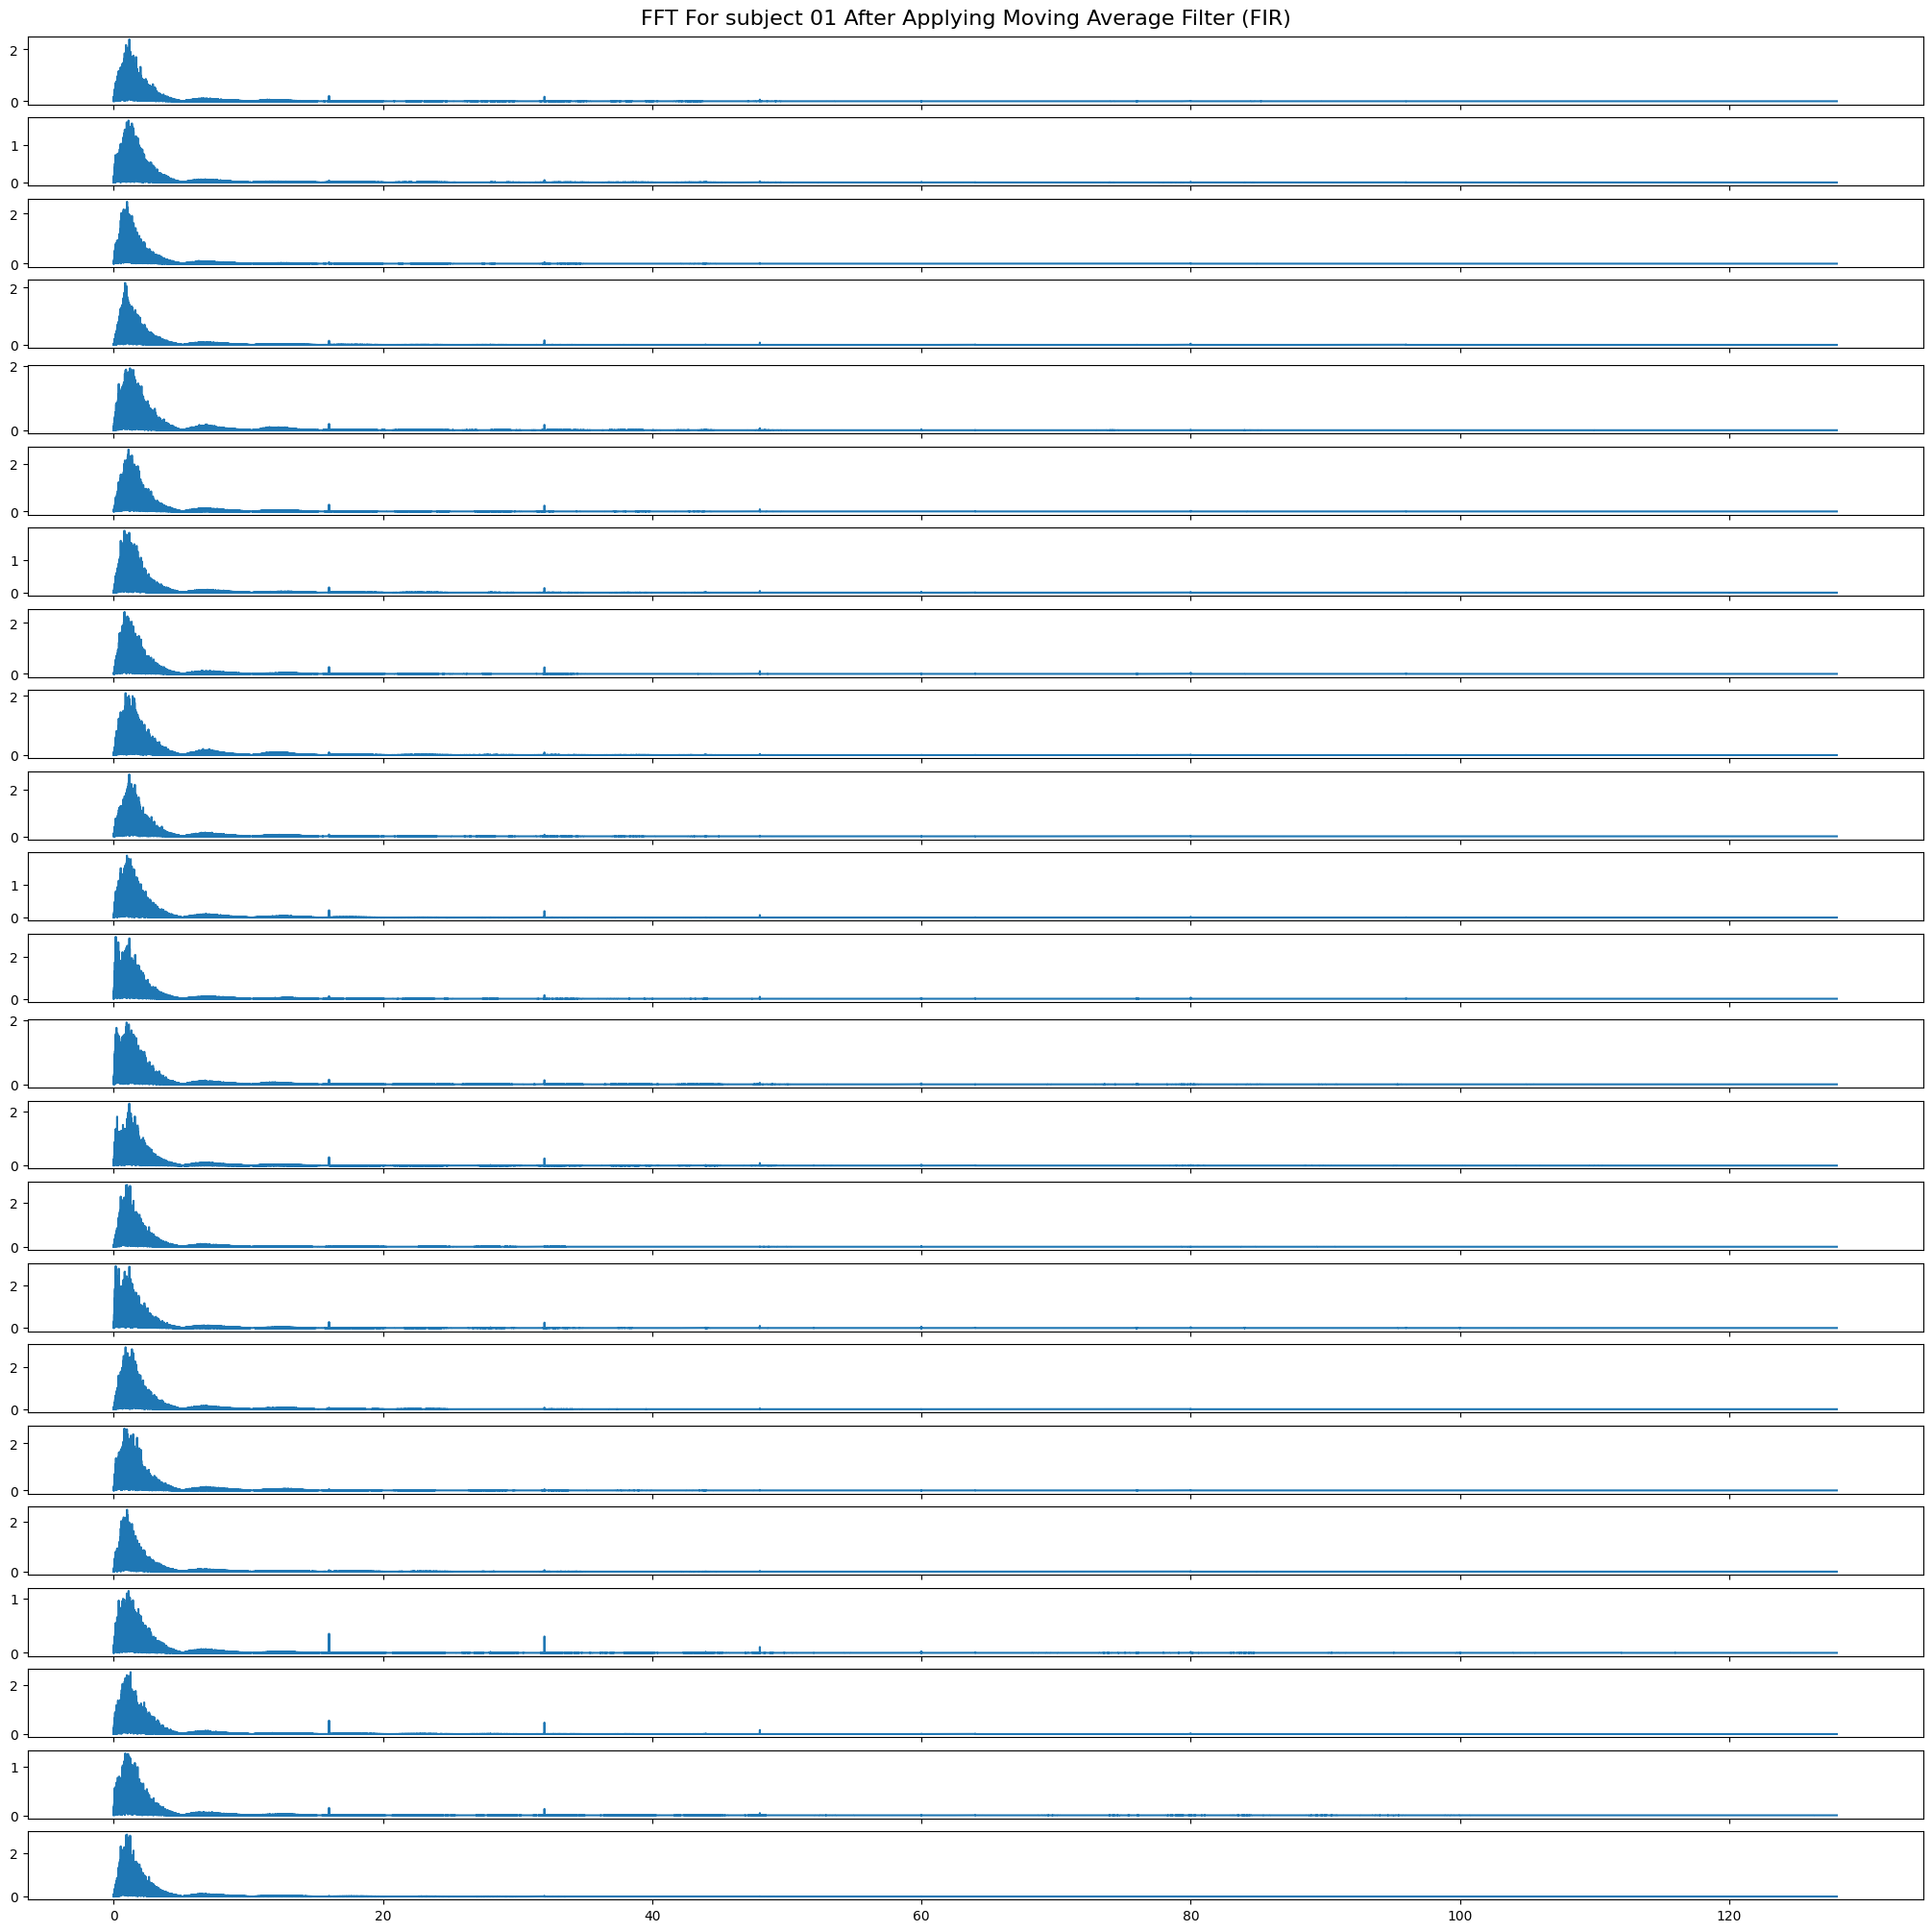

In [80]:
## Applying FFT on signals after applying moving average filter
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('FFT For subject 01 After Applying Moving Average Filter (FIR)', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    channel_DCRemoved = data1[channel] - np.mean(data1[channel])
    ma = moving_average(channel_DCRemoved, 50)  # window of length 50

    # Frequency domain representation
    fs = len(data1[channel])/3600
    fourierTransform = np.fft.fft(ma) / len(ma) # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(ma) / 2))] # Exclude 
    # sampling frequency
    tpCount = len(ma)
    values = np.arange(int(tpCount / 2))
    timePeriod = tpCount / fs
    frequencies = values / timePeriod
    # axs[i, j].plot(frequencies,abs(fourierTransform))

    # plot time signal:
    axs[channel].plot(frequencies,abs(fourierTransform))
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure


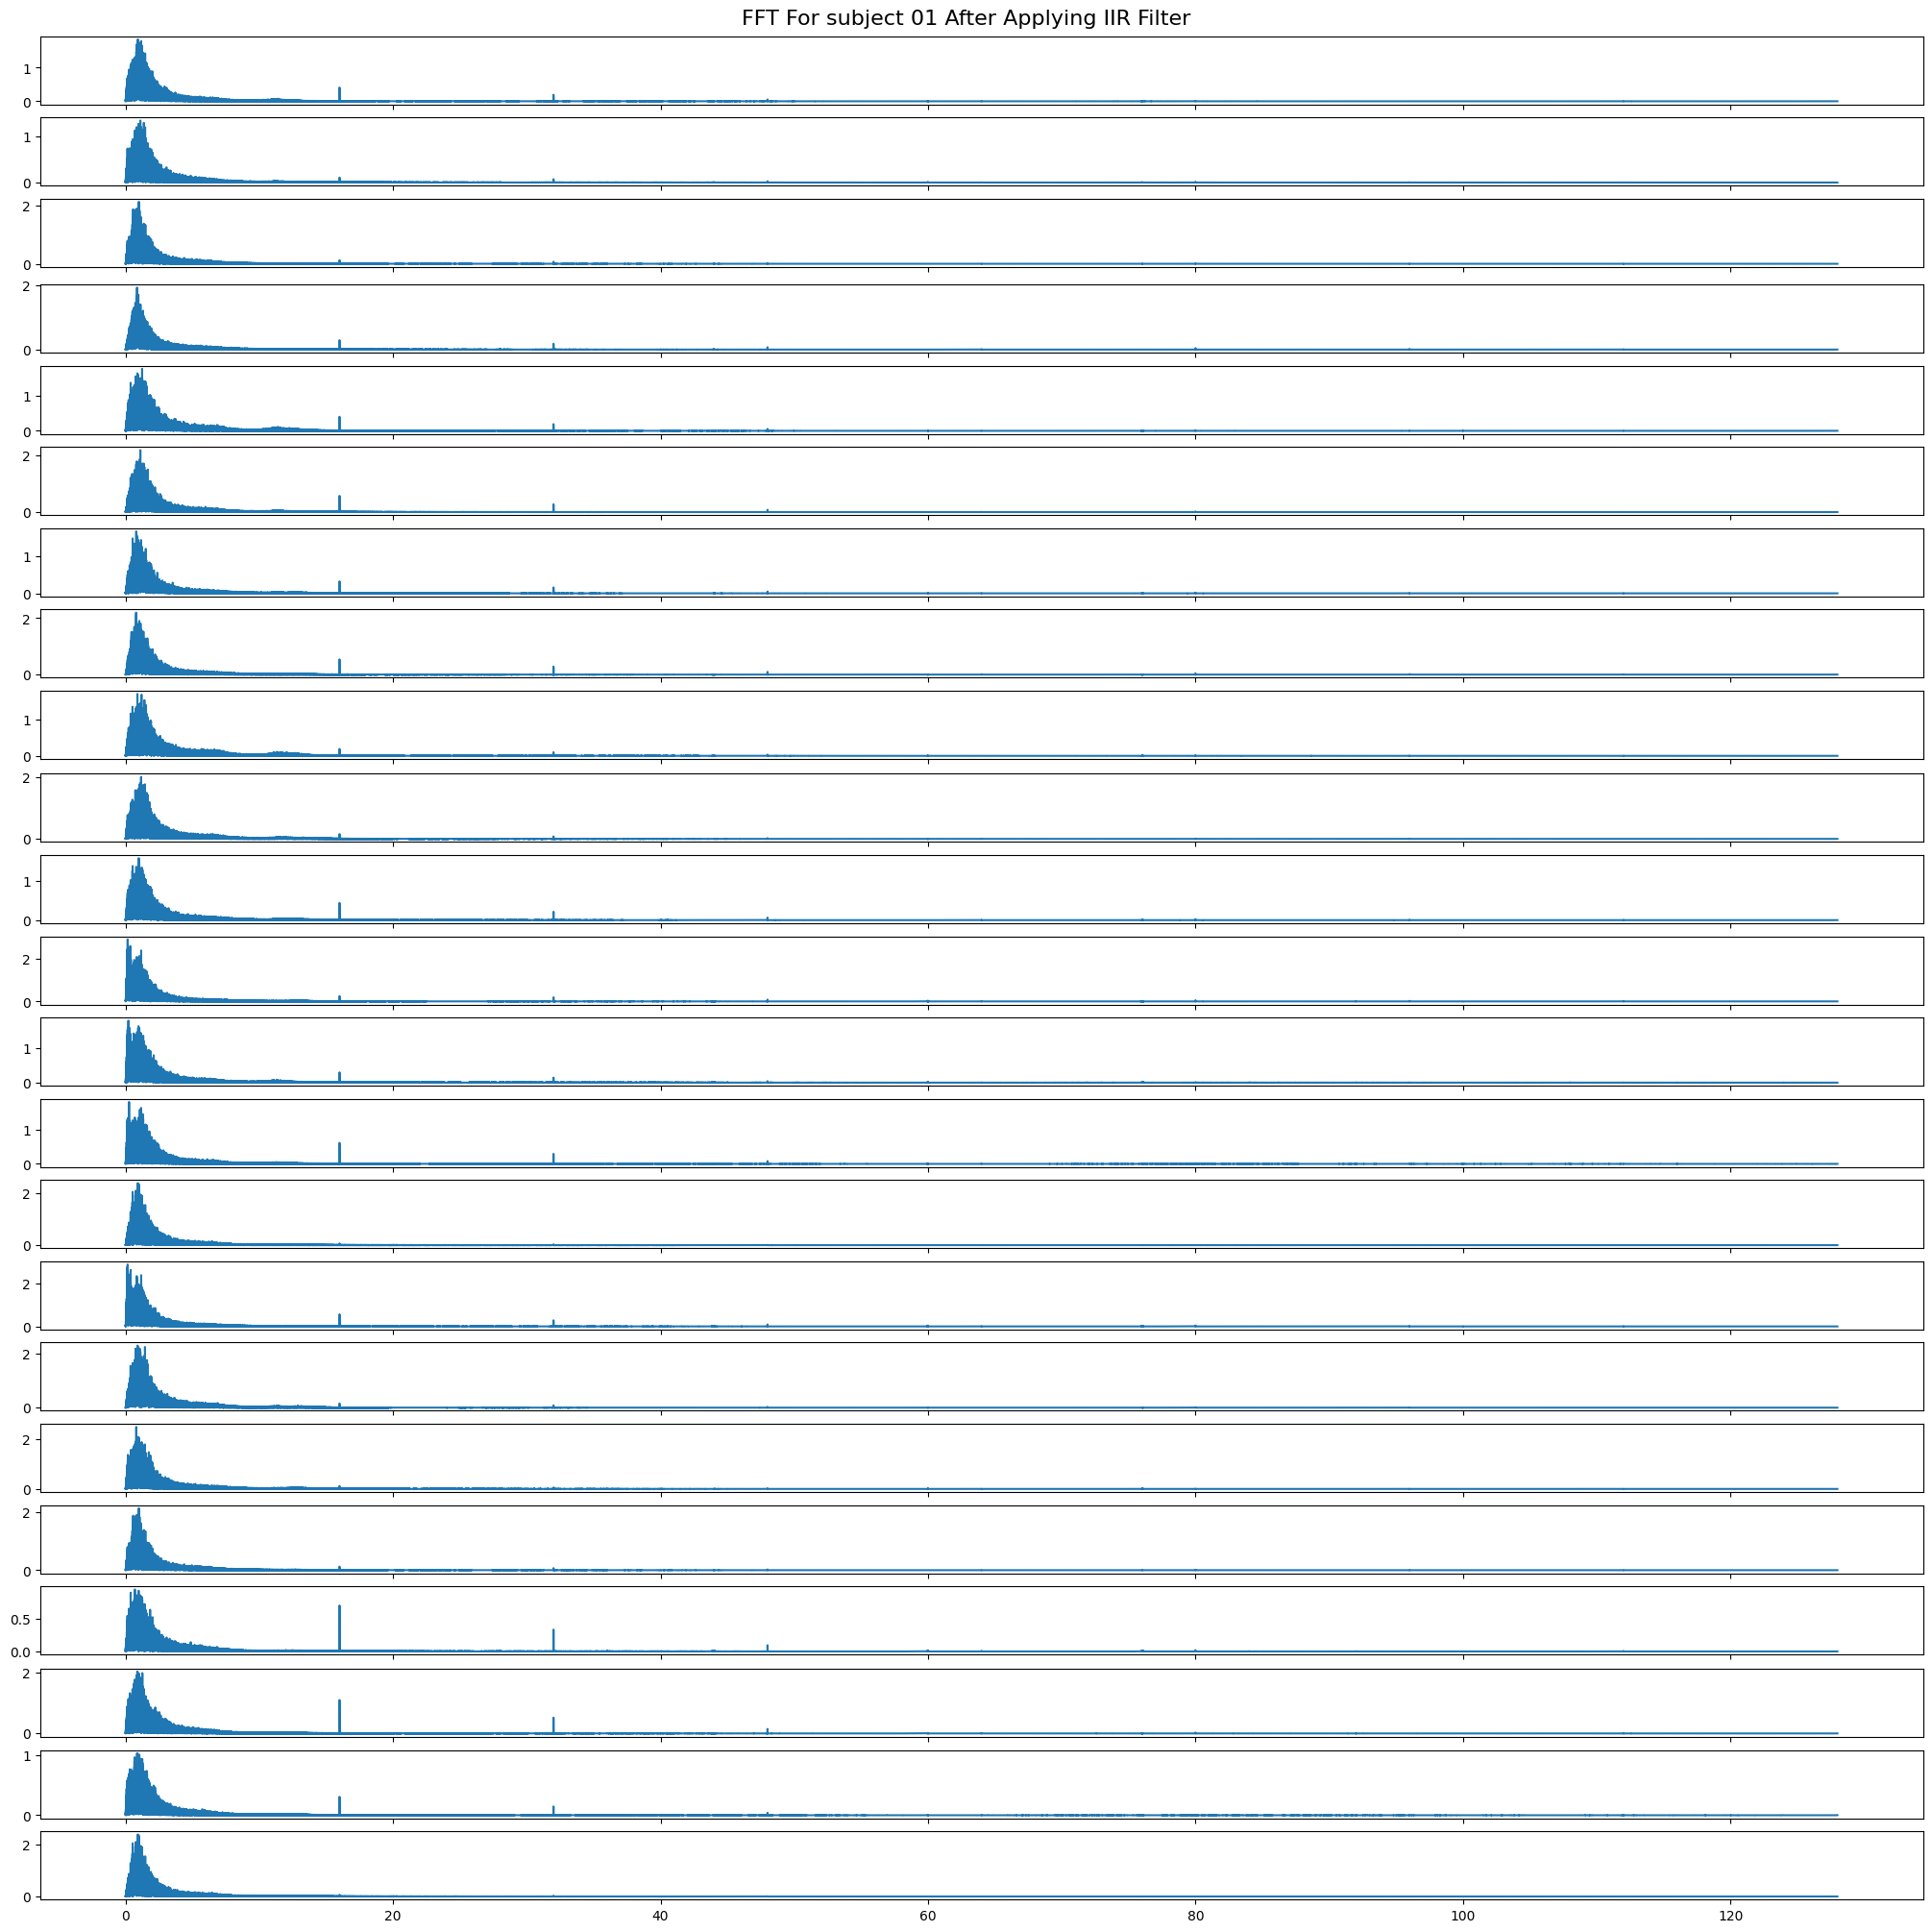

In [79]:
## Applying FFT on signals after applying IIR filter

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('FFT For subject 01 After Applying IIR Filter', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    channel_DCRemoved = data1[channel] - np.mean(data1[channel])
    ## creating IIR filter:
    a = 0.03
    b = 1 - a
    zi = lfiltic([a], [1, -b], y=[channel_DCRemoved[0]])
    y, zo = lfilter([a], [1, -b], channel_DCRemoved, zi=zi)

    # Frequency domain representation
    fs = len(data1[channel])/3600
    fourierTransform = np.fft.fft(y) / len(y) # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(y) / 2))] # Exclude 
    # sampling frequency
    tpCount = len(y)
    values = np.arange(int(tpCount / 2))
    timePeriod = tpCount / fs
    frequencies = values / timePeriod
    
    # plot time signal:
    axs[channel].plot(frequencies,abs(fourierTransform))
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure


Performing Fast Fourier Transform (FFT) on selected scales and extracting magnitudes of Fourier coefficients as seizure detection features aligns with common approaches in signal processing for seizure detection. 